# 머신러닝, 딥러닝 TITANIC템플릿

## > 머신러닝, 딥러닝 TITANIC템플릿 목적
- 간단하게 쉽게 머신러닝, 딥러닝 모델링 만들기
- 잘 몰라도 아래 순서에 맞게 , 이런식으로 실행하면 되겠구나 느끼기
- 여러분이 처음 한다고 생각하고 템플릿 작성함

## > 모델링 프로세스
1. 데이터 가져오기
2. 데이터 분석
3. 전처리
4. X, y 나누기
5. Train , Test 데이터셋 나누기
6. 머신러닝 모델링
7. 딥러닝 모델링
8. 딥러닝 성능 평가

---

# 1. 데이터 가져오기
- 먼저, 데이터가 있어야 모델링을 만들수 있다.
- 데이터 가져오는 방법에는 여러가지 있다.
 - 본인 데이터를 직접 올리는 방법
 - 기존에 제공하는 데이터 가져다 쓰는 방법

In [1]:
# 필요한 라이브러리 가져오기
# 그냥 무조건 가져온다고 생각하자 : pandas, numpy, seaborn, matplotlib.pyplot
# seaborn 설치가 되어 있지 않으면 라이브러리는 설치 필요 : !pip install seaborn
# !pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Seaborn에서 제공하는 데이터셋 확인하기
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

#### 타이타닉 데이터셋 가져오기

![타이타닉](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQav_aQ5prV7GD__U3dvOt8mkxzA6LAGd8Gfg&usqp=CAU)

In [3]:
# 많이 사용하는 데이터는 'iris' , 'tips' , 'titanic'
# 이번에 titanic 데이터셋 가져오기 
# seaborn load_dataset('titanic') 함수 활용 : 결과 titanic 저장

titanic = sns.load_dataset('titanic')

In [4]:
# 가져온 titanic 데이터 확인 하기
# 자동으로 판다스 데이터프레임 형식으로 읽어짐
print(type(titanic))
titanic

<class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# 타이타닉 데이터에 대한 전체적인 정보 보기 : info 함수

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 타이타닉 Data Dictionary
- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


# 2. 데이터 분석
- 눈으로 데이터 수치를 보고 어떤 흐름인지 파악할수 있지만,
- 시각화를 통한다면 쉽게 흐름을 파악할수 있으니, 할수 있으면 사용해라.
- 여러분에게는 어려울수 있으니, 아, 이렇게 데이터를 가지고 시각화를 할수 있구나 느낀면 된다.

In [6]:
# 간단하게 시각화해 보기
# 여러분은 잘 모르지만, 나중에 이렇게 시각화를 할수 있구나 알기

# 판다스 value_counts 함수 이용해서 survived 컬럼 값 분포 확인

titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

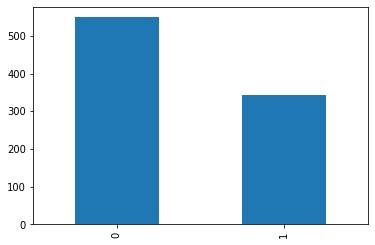

In [7]:
# survived 컬럼 값 분포 확인에 대한 바차트 그리기

titanic['survived'].value_counts().plot(kind='bar')

In [8]:
# 판다스 value_counts 함수 이용해서 pclass 값 분포 확인

titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

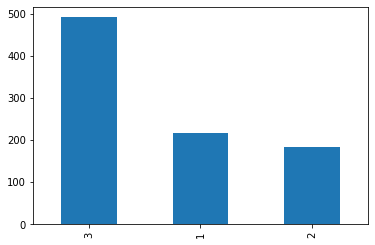

In [9]:
# 판다스 value_counts 함수 이용해서 pclass 값 분포에 대한 바차트

titanic['pclass'].value_counts().plot(kind='bar')

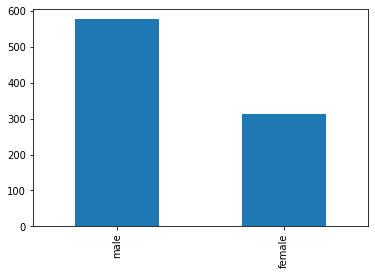

In [10]:
# 판다스 value_counts 함수 이용해서 sex 값 분포에 대한 바차트

titanic['sex'].value_counts().plot(kind='bar')

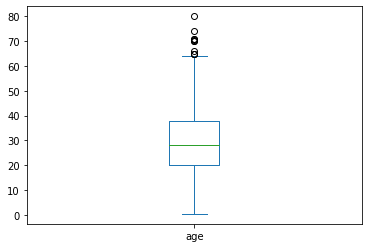

In [11]:
# age 컬럼에 대한 box 차트
# 나이 분포를 볼때 중간값이 26 정도 되며, 전체적으로 나이가 많은쪽으로 넓게 있다.

titanic['age'].plot(kind='box')

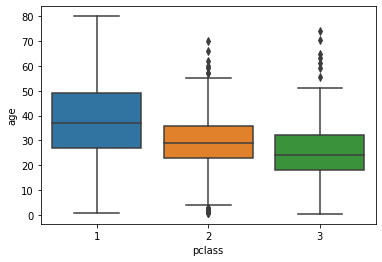

In [12]:
# seaborn boxplot 이용하여 pclass별로 age 분포 확인.(data=titanic, x='pclass', y='age')
# 1등급에 나이 있는 분들이 더 많고 등급이 낮아질수록 나이가 어리다.

sns.boxplot(data=titanic, x='pclass', y='age')

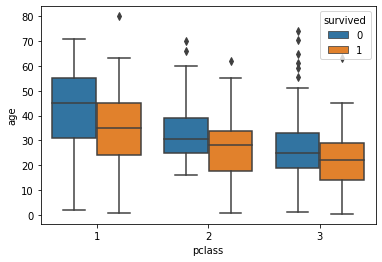

In [13]:
# boxplot 이용하여 pclass별로 age 분포 확인. 또한 survived 키로 분류해 보자.(hue='survived')
# 1등급에 있는 분들이 다른 등급에 있는 분들보다 더 많이 살아남았음 알수 있따.

sns.boxplot(data=titanic, x='pclass', y='age', hue='survived')

In [14]:
# pclass별로 어느정도 살아 남았는지 확인 : pclass에 대해 groupby 하고 survived 컬럼에 대한 평균값 구하기 
# groupby 한 결과를 pclass_grp 변수에 저장하고 출력하기

pclass_grp = titanic.groupby('pclass')['survived'].mean()
pclass_grp

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

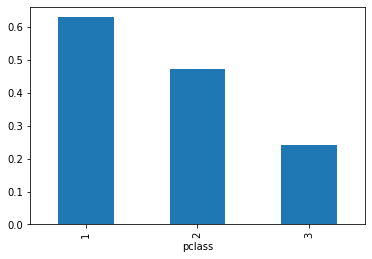

In [15]:
# pclass_grp 데이터프레임에서 x='pclass', y='survived' 해서 bar 차트 그리기

pclass_grp.plot(kind='bar', x='pclass', y='survived')

---

# 3. 전처리
- 전처리를 왜 해야 할까요?
- 불필요한 컬럼을 삭제하거나, 빈공간을 채우기등
- 모든 데이터가 컴퓨터가 이해할수 있는 숫자로 되어야 한다.
- 결국, 깔끔하고 깨끗한 숫자형 데이터로 만들어야 한다.

In [16]:
# 타이타닉 정보 보기 : info 함수

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
# 중복 컬럼 삭제 : class, alive 
# 판다스 drop 함수 활용 : ['class', 'alive'], axis=1, inplace=True

titanic.drop(['class', 'alive'], axis=1, inplace=True)

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.7+ KB


In [19]:
# 내용을 간단하기 위해서 편의대로 컬럼을 drop함수 활용하여 삭제 : 'embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alone'
# 옵션 : axis=1, inplace=True

titanic.drop(['embarked', 'who', 'adult_male', 'deck', 'embark_town', 'alone'], axis=1, inplace=True)

In [20]:
# 타이타닉 내용 앞 5개 보기 : head 함수

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [21]:
# sex 컬럼에 대해 male : 0 , female : 1로 변환 
# 판다스 replace 함수 활용 : ['male', 'female'], [0, 1], inplace=True

titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [22]:
# 타이타닉 내용 뒤 5개 보기 : tail 함수

titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare
886,0,2,0,27.0,0,0,13.00
887,1,1,1,19.0,0,0,30.00
888,0,3,1,NaN,1,2,23.45
889,1,1,0,26.0,0,0,30.00
890,0,3,0,32.0,0,0,7.75


In [23]:
# null 여부 확인 

titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [24]:
# 1. age컬럼에 대한 평균값 구하고 age_mean 변수에 저장
# 2. 판다스 fillna로 age 중간값으로 채우자. (inplace=True)

age_mean = titanic['age'].mean()
titanic['age'].fillna(age_mean, inplace=True)

In [25]:
# null 여부 다시 확인

titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# 4. X, y 나누기
- 지도학습 경우 데이터와 정답이 있어야 합니다.
- 데이터에 해당하는 X와 정답에 해당하는 y가 있어야 합니다.
- 아래와 같이 판다스를 이용하면 X, y를 쉽게 나눌수 있어요

In [26]:
# 다시 한번 타이타닉 데이터셋 보기
# 타이타닉 데이터 앞 5개 보기 : head 함수

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [27]:
# X 분리 
# 판다스 drop 함수 활용하여 'survived' 컬럼 삭제하고 나머지를 X에 저장

X = titanic.drop('survived', axis=1)

In [28]:
# 분리된 X 데이터 앞 5개 보기 : head 함수

X.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [29]:
# y 분리 
# survived 컬럼값을 y에 저장한다.

y = titanic['survived']

In [30]:
# 분리된 y 확인

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [31]:
# Series, DataFrame 형태를 numpy array 변경하기 
# 뒤쪽에서 타입이 맞지 않아서 에러 날수 있기 때문에
# X.values , y.values --> X , y 입력

X = X.values
y = y.values

In [32]:
print(X[:2])
print(y[:2])

[[ 3.      0.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]]
[0 1]


---

# 5. Train , Test 데이터셋 나누기
- 데이터를 가지고 모델을 학습 시키고 나서 모델 평가를 해야 하는데
- 모델이 학습한 데이터를 가지고 평가를 하지 않고 
- 모델이 모르는 데이터로 평가를 해야 공정하고 평가 결과가 잘 나온다면 배포(일반화) 가능하다.

In [33]:
# Train / Test 데이터셋 나누어주는 함수 : train_test_split

from sklearn.model_selection import train_test_split

In [35]:
# train_test_split 함수 활용
# 입력 : X, y 
# Train : Test => 8 : 2  비율로 나누기 : test_size=0.2
# 매번 같은 결과 나오도록 값 고정 : random_state=42
# 결과 저장 : X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [36]:
# Train 과 Test 데이터셋 사이즈 확인
# X_train.shape, X_test.shape, y_train.shape, y_test.shape 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

---

# 6. 머신러닝 모델링
- DecisionTree 결정트리
- RandomForest 앙상블

#### DecisionTree

![결정트리](http://gavinln.github.io/blog-site/img/decision_trees/tree-depth-2.png)

In [37]:
# DecisionTree 머신러닝 모델링
from sklearn.tree import DecisionTreeClassifier

In [38]:
# 1. DecisionTreeClassifier 모델 정의 -> dt 저장
# 2. dt 모델 학습(fit) : X_train, y_train
# 3. dt 모델 성능확인(score) : X_test, y_test


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7653631284916201

#### RandomForest

![RandomForest](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdDE2Rk%2FbtqvUzlulvU%2F6UbCGO8rHAhDJDCE3dyRr0%2Fimg.png)

In [39]:
# RandomForest 머신러닝 모델링
from sklearn.ensemble import RandomForestClassifier

In [40]:
# 1. RandomForestClassifier 모델 정의 -> rf 저장
# 2. rf 모델 학습(fit) : X_train, y_train
# 3. rf 모델 성능확인(score) : X_test, y_test

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7988826815642458

In [41]:
# X_test 첫번째 데이터 보기

X_test[0]

array([ 3.        ,  0.        , 29.69911765,  1.        ,  1.        ,
       15.2458    ])

In [42]:
# 예측해 보기
# rf 모델 predict 함수 활용 
# 입력 : 첫번재 데이터 --> [X_test[0]]
# 예측 결과를 rf_pred 저장 및 출력

rf_pred = rf.predict([X_test[0]])
rf_pred

array([0])

---

# 7. 딥러닝 모델링

In [43]:
# 딥러닝 필요한 라이브러리 가져오기

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

![DNN](https://www.kdnuggets.com/wp-content/uploads/neural-network-input-hidden-output.jpg)

In [44]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (6, )
# hidden layer : 10 unit , activation='relu'
# output layer : 2 unit , activation='softmax'

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(6,)))
model.add(Dense(2, activation='softmax'))

In [45]:
# 모델 컴파일 : compile
# loss='sparse_categorical_crossentropy'
# optimizer='adam'
# metrics=['accuracy']

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# 모델 학습 : fit
# X_train, y_train, epochs=10, batch_size=8
# 학습결과 저장 : history

history = model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
89/89 [==============================] - 1s 2ms/step - loss: 3.6894 - accuracy: 0.3343
Epoch 2/10
89/89 [==============================] - 0s 2ms/step - loss: 1.4626 - accuracy: 0.3343
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.9732 - accuracy: 0.4635
Epoch 4/10
89/89 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.5927
Epoch 5/10
89/89 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.6292
Epoch 6/10
89/89 [==============================] - 0s 2ms/step - loss: 0.7397 - accuracy: 0.6250
Epoch 7/10
89/89 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6404
Epoch 8/10
89/89 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6587
Epoch 9/10
89/89 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6798
Epoch 10/10
89/89 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7149


## epochs 늘려 좀더 공부시키자.
- 아무리 공부해도 성능이 더 이상 오르지 않는구나

In [47]:
# epochs 횟수 증가하여 모델 학습 : fit
# X_train, y_train, epochs=30, batch_size=8 --> epochs 30으로 변경
# 학습결과 저장 : history

history = model.fit(X_train, y_train, epochs=30, batch_size=8)

Epoch 1/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7247
Epoch 2/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7233
Epoch 3/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7500
Epoch 4/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7584
Epoch 5/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7612
Epoch 6/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7697
Epoch 7/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7697
Epoch 8/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7921
Epoch 9/30
89/89 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7935
Epoch 10/30
89/89 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.8006
Epoch 11/30
89/89 [

## 히든 레이어 더 쌓아 학습해 보자

![레이어추가](https://cdn.educba.com/academy/wp-content/uploads/2020/03/DNN-Neural-Network-1.png.webp)

In [48]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (6, )
# hidden layer : 32 unit , activation='relu'
# hidden layer : 16 unit , activation='relu'
# output layer : 2 unit , activation='softmax'

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [49]:
# 모델 컴파일 : compile
# loss='sparse_categorical_crossentropy'
# optimizer='adam'
# metrics=['accuracy']

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# 모델 학습 : fit
# X_train, y_train, epochs=30, batch_size=8
# 학습결과 저장 : history

history = model.fit(X_train, y_train, epochs=30, batch_size=8)

Epoch 1/30
89/89 [==============================] - 1s 2ms/step - loss: 1.0560 - accuracy: 0.6503
Epoch 2/30
89/89 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6713
Epoch 3/30
89/89 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6798
Epoch 4/30
89/89 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6966
Epoch 5/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7247
Epoch 6/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7416
Epoch 7/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7374
Epoch 8/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7542
Epoch 9/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7542
Epoch 10/30
89/89 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7697
Epoch 11/30
89/89 [

## DNN 학습때 학습이 잘되는지 보기 위해 모르는 데이터(valid data)로 평가해 보자

In [51]:
# Sequential 모델 만들기 --> model 변수 저장
# input layer : (6, )
# hidden layer : 32 unit , activation='relu'
# hidden layer : 16 unit , activation='relu'
# output layer : 2 unit , activation='softmax'

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [52]:
# 모델 컴파일 : compile
# loss='sparse_categorical_crossentropy'
# optimizer='adam'
# metrics=['accuracy']

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
# 모델 학습 : fit
# X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test)
# 학습결과 저장 : history

# validation_data 옵션을 추가해서 모델 학습에 대한 평가를 할수 있다.
# 즉, 모르는 데이터에 대해 성능평가 잘 나온다면 좋은것이다. 

history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/30
89/89 [==============================] - 1s 5ms/step - loss: 1.1885 - accuracy: 0.5534 - val_loss: 0.5545 - val_accuracy: 0.7151
Epoch 2/30
89/89 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.6798 - val_loss: 0.5323 - val_accuracy: 0.7318
Epoch 3/30
89/89 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.6994 - val_loss: 0.5993 - val_accuracy: 0.6257
Epoch 4/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.7008 - val_loss: 0.5397 - val_accuracy: 0.7374
Epoch 5/30
89/89 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.6994 - val_loss: 0.5260 - val_accuracy: 0.7542
Epoch 6/30
89/89 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7289 - val_loss: 0.5512 - val_accuracy: 0.7486
Epoch 7/30
89/89 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7331 - val_loss: 0.5036 - val_accuracy: 0.7374
Epoch 8/30
89/89 [==

---

# 8. 딥러닝 성능 평가

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

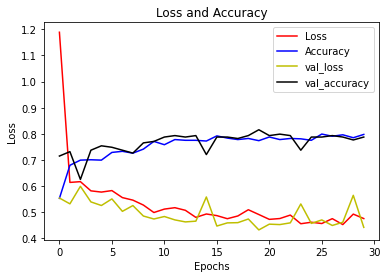

In [54]:
# matplotlib 이용하여 그래프 그리기
# 1. plot 그리기 : 입력  history.history['loss'], 'r'
# 2. plot 그리기 : 입력  history.history['accuracy'], 'b'
# 3. plot 그리기 : 입력  history.history['val_loss'], 'y'
# 4. plot 그리기 : 입력  history.history['val_accuracy'], 'k'
# 5. title : 'Loss and Accuracy'
# 6. xlabel : "Epochs"
# 7. ylabel : "Loss"
# 8. ["Loss", "Accuracy", 'val_loss', 'val_accuracy']
# 7. plt.show()

plt.plot(history.history['loss'], 'r')
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_loss'], 'y')
plt.plot(history.history['val_accuracy'], 'k')
plt.title('Loss and Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Accuracy", 'val_loss', 'val_accuracy'])
plt.show()